# Image Load and Analysis
Uses Ollama LLM and OCR

Download Ollama from its home page https://ollama.com and follow the instructions to run it on your computer. <br>
For working with images, download and run the model __llama3.2-vision__ 

In [ ]:
# !ollama pull llama3.2-vision:11b

In [ ]:
# !pip install ollama-ocr

In [1]:
!ollama list

NAME                                        ID              SIZE      MODIFIED      
mistral-small:latest                        8039dd90c113    14 GB     2 months ago     
deepseek-r1:8b                              28f8fd6cdc67    4.9 GB    2 months ago     
gemma2:9b                                   ff02c3702f32    5.4 GB    3 months ago     
llama3.2-vision:latest                      085a1fdae525    7.9 GB    3 months ago     
nomic-embed-text:latest                     0a109f422b47    274 MB    7 months ago     
tomasonjo/codestral-text2cypher:latest      8c90403b1d80    13 GB     10 months ago    
tomasonjo/llama3-text2cypher-demo:latest    e5c510fba677    4.9 GB    10 months ago    
snowflake-arctic-embed:latest               21ab8b9b0545    669 MB    10 months ago    


In [4]:
import ollama
from ollama import chat
from ollama_ocr import OCRProcessor

In [5]:
import os

In [13]:
# for visualisation
from IPython.display import Image, display, Markdown

In [6]:
llm = 'llama3.2-vision'

In [7]:
path = '/Users/tdi/Documents/Teaching/BI/2025/Images/'

## Case 1: Download and Explain an Image

In [8]:
def explain(path):
    response = ollama.chat(
        model=llm, 
        messages=[{
            'role': 'user',
            'content': 'Can you explain what is on this image?',
            'images': [path]
        }]
    )
    return response.message.content

### Test

In [9]:
file1 = "two-foxes.jpeg"

In [10]:
path1 = os.path.join(path, file1)

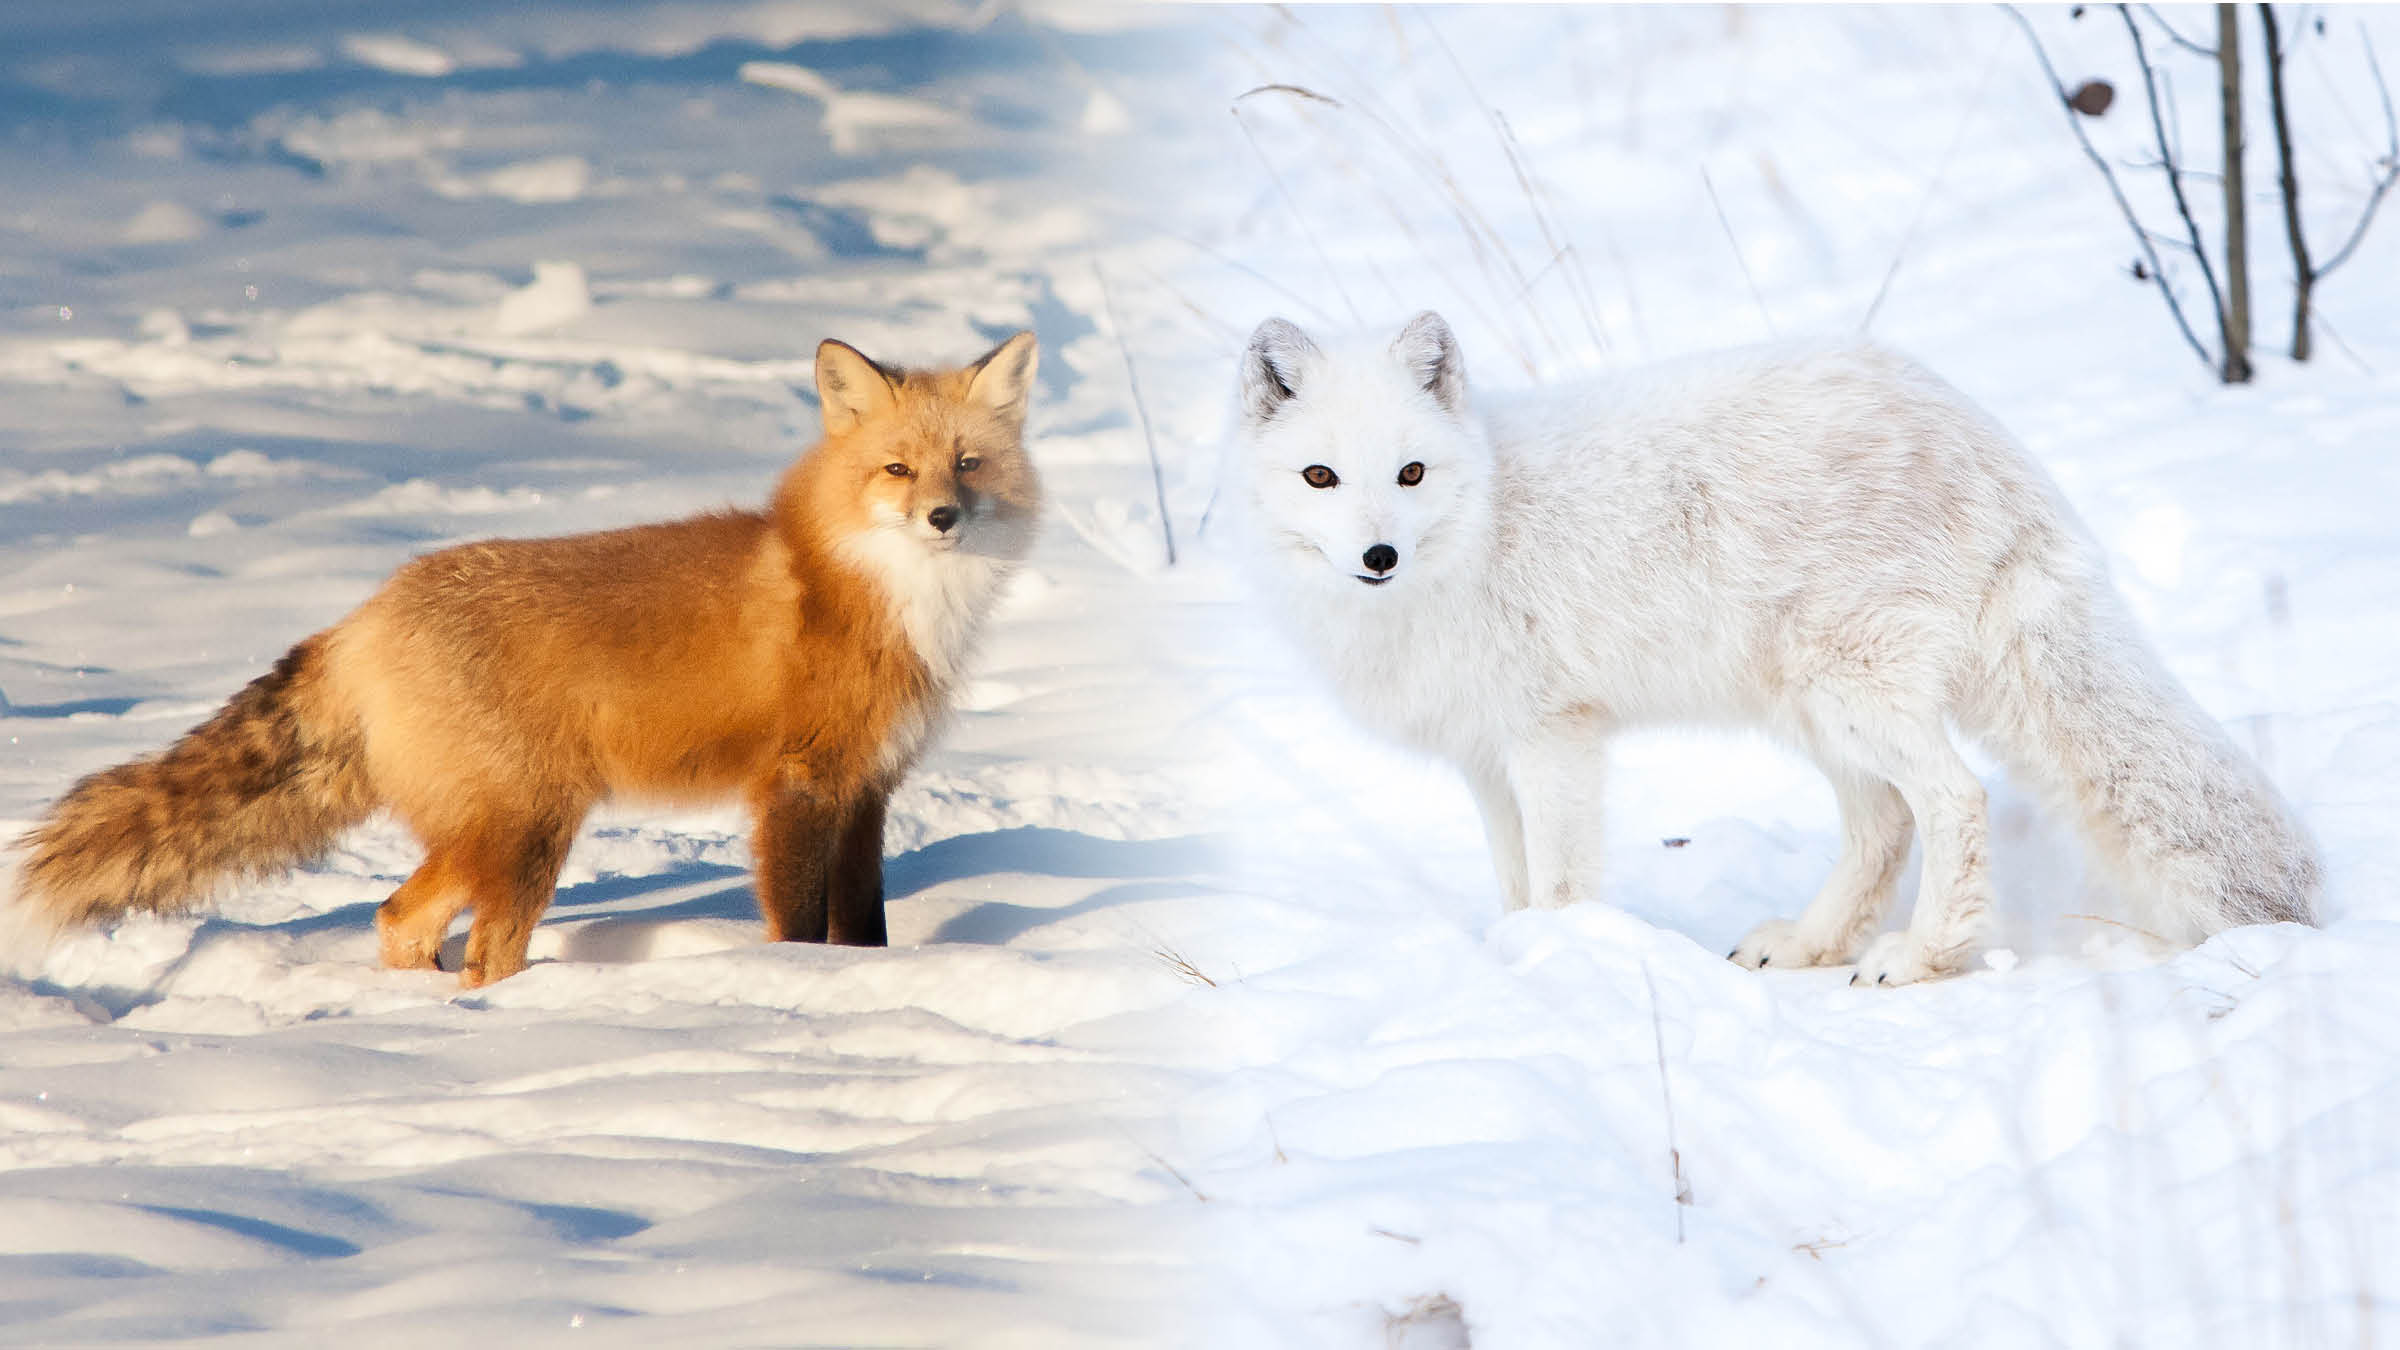

In [14]:
# Display the image
display(Image(filename=path1, width=400))

In [15]:
result = explain(path1)
result

'The image features two red foxes, one with a striking white coat and the other sporting its natural reddish-brown hue.\n\n**Key Characteristics:**\n\n* The red fox is a common species found in various parts of the world.\n* It is known for its distinctive coloration, which can range from red to orange to yellow.'

## Case 2: Download Image and Extract the Text from It

In [16]:
# Create an instance
ocr = OCRProcessor(model_name=llm)

In [17]:
def extract (path, output):
    response = ocr.process_image(
        image_path=path,
        format_type=output,
    )
    return response

### Test

In [18]:
output_type = input()
# output_type = "markdown"

 markdown


In [19]:
file2 = 'invoice.jpeg'

In [20]:
path2 = os.path.join(path, file2)

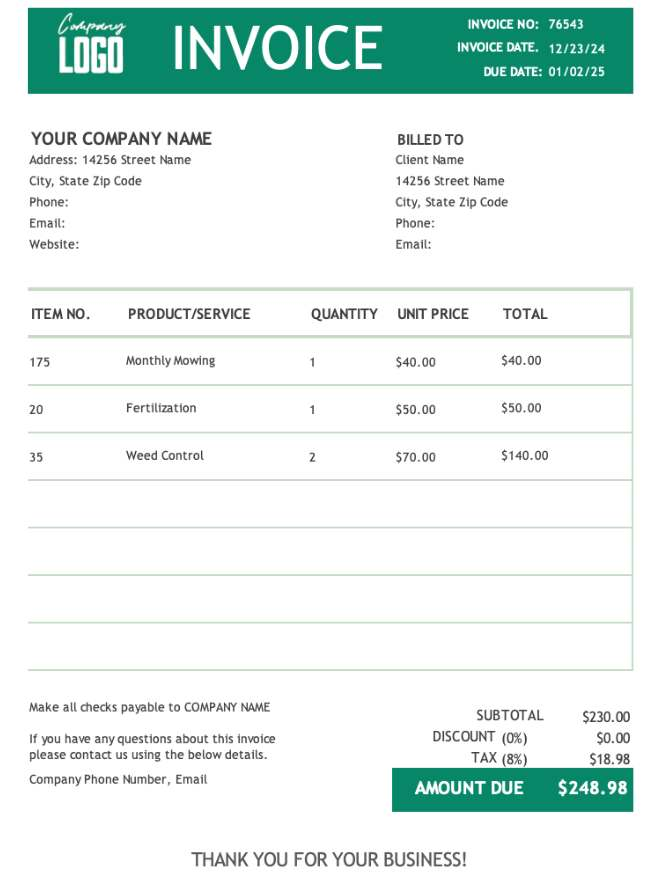

In [21]:
# Display the image
display(Image(filename=path2, width=400))

In [22]:
response = extract(path2, output_type)
response

'**Invoice Template**\n\n### Company Information\n\n* **Company Name:** Not specified\n* **Address:**\n\t+ 14256 Street Name\n\n### Billing Information\n\n* **Bill To:**\n\t+ Client Name\n\t+ 14256 Street Name\n\n### Invoice Details\n\n#### Services Provided\n\n* Monthly Mowing\n* Fertilization\n* Weed Control\n\n#### Quantity and Unit Price\n\n* Monthly Mowing:\n\t+ Quantity: 1\n\t+ Unit Price: $40.00\n* Fertilization:\n\t+ Quantity: 1\n\t+ Unit Price: $50.00\n* Weed Control:\n\t+ Quantity: 2\n\t+ Unit Price: $70.00\n\n#### Subtotal and Total\n\n* **Subtotal:** Not specified\n* **Total:** $248.98\n\n### Payment Terms\n\n* Make all checks payable to Company Name\n* If you have any questions about this invoice, please contact us using the details provided.\n\n**Thank You for Your Business**\n\nThis template provides a basic structure for creating an invoice, but it does not include specific company information or pricing details. The client\'s name and address are also missing in the "B

In [23]:
display(Markdown(response))

**Invoice Template**

### Company Information

* **Company Name:** Not specified
* **Address:**
	+ 14256 Street Name

### Billing Information

* **Bill To:**
	+ Client Name
	+ 14256 Street Name

### Invoice Details

#### Services Provided

* Monthly Mowing
* Fertilization
* Weed Control

#### Quantity and Unit Price

* Monthly Mowing:
	+ Quantity: 1
	+ Unit Price: $40.00
* Fertilization:
	+ Quantity: 1
	+ Unit Price: $50.00
* Weed Control:
	+ Quantity: 2
	+ Unit Price: $70.00

#### Subtotal and Total

* **Subtotal:** Not specified
* **Total:** $248.98

### Payment Terms

* Make all checks payable to Company Name
* If you have any questions about this invoice, please contact us using the details provided.

**Thank You for Your Business**

This template provides a basic structure for creating an invoice, but it does not include specific company information or pricing details. The client's name and address are also missing in the "Bill To" section.